In [ ]:
!pip install torch torchtext==0.15.2
!pip install wget
!pip install tqdm
!pip install pandas numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

Creating synthetic medical dataset...
Using device: cpu

Starting training...


100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


Epoch: 01
	Train Loss: 1.411 | Train Acc: 37.97%
	Valid Loss: 0.917 | Valid Acc: 91.88%


100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


Epoch: 02
	Train Loss: 0.738 | Train Acc: 76.72%
	Valid Loss: 0.341 | Valid Acc: 95.62%


100%|██████████| 20/20 [00:02<00:00,  7.36it/s]


Epoch: 03
	Train Loss: 0.235 | Train Acc: 96.88%
	Valid Loss: 0.126 | Valid Acc: 98.75%


100%|██████████| 20/20 [00:02<00:00,  8.96it/s]


Epoch: 04
	Train Loss: 0.087 | Train Acc: 98.91%
	Valid Loss: 0.071 | Valid Acc: 98.75%


100%|██████████| 20/20 [00:02<00:00,  9.02it/s]


Epoch: 05
	Train Loss: 0.058 | Train Acc: 99.53%
	Valid Loss: 0.049 | Valid Acc: 99.38%


100%|██████████| 20/20 [00:02<00:00,  8.94it/s]


Epoch: 06
	Train Loss: 0.037 | Train Acc: 99.53%
	Valid Loss: 0.038 | Valid Acc: 99.38%


100%|██████████| 20/20 [00:02<00:00,  6.85it/s]


Epoch: 07
	Train Loss: 0.026 | Train Acc: 99.69%
	Valid Loss: 0.033 | Valid Acc: 99.38%


100%|██████████| 20/20 [00:02<00:00,  7.33it/s]


Epoch: 08
	Train Loss: 0.025 | Train Acc: 99.53%
	Valid Loss: 0.027 | Valid Acc: 99.38%


100%|██████████| 20/20 [00:02<00:00,  8.99it/s]


Epoch: 09
	Train Loss: 0.018 | Train Acc: 99.69%
	Valid Loss: 0.024 | Valid Acc: 99.38%


100%|██████████| 20/20 [00:02<00:00,  8.99it/s]


Epoch: 10
	Train Loss: 0.017 | Train Acc: 99.69%
	Valid Loss: 0.021 | Valid Acc: 99.38%


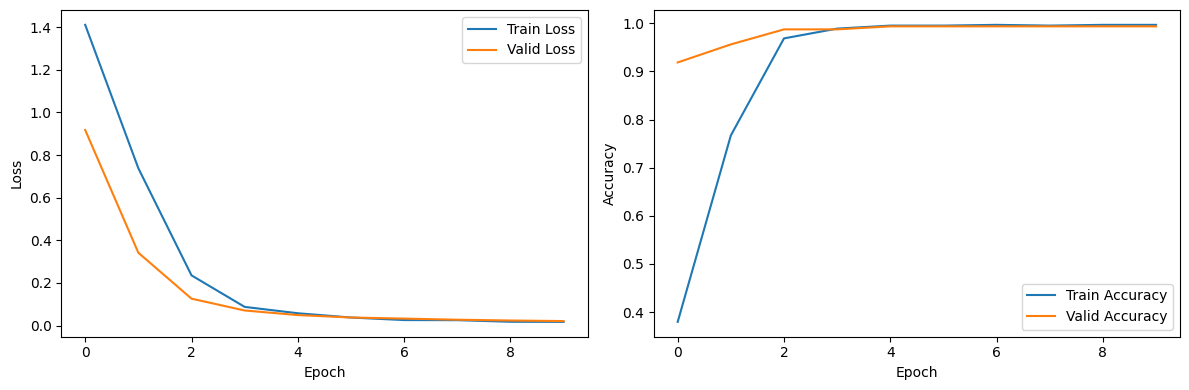


Test Loss: 0.008 | Test Acc: 100.00%

Sample Predictions:

Text excerpt: diagnosed presented presented diagnosed condition medical symptoms condition examination treatment history presented condition prescribed history condition condition presented presented diagnosed brai...
True label: Neurology
Predicted label: Neurology

Text excerpt: history condition patient patient symptoms presented patient diagnosed condition presented history medical presented medical examination diagnosed diagnosed prescribed medical medical prescribed diagn...
True label: Pediatrics
Predicted label: Pediatrics

Text excerpt: presented presented medical prescribed symptoms examination medical presented examination condition condition diagnosed examination prescribed medical diagnosed symptoms symptoms examination condition...
True label: Orthopedics
Predicted label: Orthopedics

Text excerpt: diagnosed diagnosed examination hypertension history treatment presented symptoms prescribed diagnosed presented his

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

# Create synthetic medical dataset for demonstration
def create_synthetic_dataset(n_samples=1000):
    medical_specialties = ['Cardiology', 'Neurology', 'Orthopedics', 'Pediatrics']

    # Create sample texts and labels
    texts = []
    labels = []

    keywords = {
        'Cardiology': ['heart', 'cardiac', 'chest pain', 'blood pressure', 'hypertension'],
        'Neurology': ['brain', 'headache', 'seizure', 'neurological', 'migraine'],
        'Orthopedics': ['bone', 'joint', 'fracture', 'spine', 'arthritis'],
        'Pediatrics': ['child', 'pediatric', 'vaccination', 'growth', 'development']
    }

    common_words = ['patient', 'symptoms', 'treatment', 'diagnosed', 'prescribed',
                   'examination', 'medical', 'history', 'presented', 'condition']

    for _ in range(n_samples):
        specialty = np.random.choice(medical_specialties)
        spec_keywords = keywords[specialty]

        # Generate a random medical note
        note_length = np.random.randint(50, 200)
        note_words = []

        # Add specialty-specific keywords
        n_keywords = np.random.randint(3, 6)
        note_words.extend(np.random.choice(spec_keywords, n_keywords))

        # Add common medical words
        n_common = note_length - len(note_words)
        note_words.extend(np.random.choice(common_words, n_common))

        # Shuffle words and create text
        np.random.shuffle(note_words)
        text = ' '.join(note_words)

        texts.append(text)
        labels.append(specialty)

    return pd.DataFrame({'text': texts, 'specialty': labels})

# Rest of the code remains the same, just update the data loading part
class TextPreprocessor:
    def __init__(self, max_vocab_size=10000):
        self.max_vocab_size = max_vocab_size
        self.word2idx = {'<pad>': 0, '<unk>': 1}
        self.idx2word = {0: '<pad>', 1: '<unk>'}
        self.word_freq = Counter()

    def fit(self, texts):
        # Count word frequencies
        for text in texts:
            words = self._tokenize(text)
            self.word_freq.update(words)

        # Build vocabulary using most common words
        common_words = [word for word, _ in self.word_freq.most_common(self.max_vocab_size - 2)]
        for word in common_words:
            if word not in self.word2idx:
                idx = len(self.word2idx)
                self.word2idx[word] = idx
                self.idx2word[idx] = word

    def _tokenize(self, text):
        # Simple tokenization by splitting on whitespace and removing punctuation
        text = re.sub(r'[^\w\s]', '', text.lower())
        return text.split()

    def transform(self, text, max_length=128):
        words = self._tokenize(text)
        indices = [self.word2idx.get(word, self.word2idx['<unk>']) for word in words]

        if len(indices) < max_length:
            indices += [self.word2idx['<pad>']] * (max_length - len(indices))
        else:
            indices = indices[:max_length]

        return indices

# Custom Dataset class
class MedicalDataset(Dataset):
    def __init__(self, texts, labels, preprocessor, max_length=128):
        self.texts = texts
        self.labels = labels
        self.preprocessor = preprocessor
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Convert text to indices
        indices = self.preprocessor.transform(text, self.max_length)
        return torch.tensor(indices), torch.tensor(label)

# CNN Model
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1,
                     out_channels=n_filters,
                     kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])

        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.unsqueeze(1)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

# Training function
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in tqdm(iterator):
        text, labels = batch
        text = text.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        predictions = model(text)
        loss = criterion(predictions, labels)

        _, predicted = torch.max(predictions, 1)
        acc = (predicted == labels).float().mean()

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Evaluation function
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        for batch in iterator:
            text, labels = batch
            text = text.to(device)
            labels = labels.to(device)

            predictions = model(text)
            loss = criterion(predictions, labels)

            _, predicted = torch.max(predictions, 1)
            acc = (predicted == labels).float().mean()

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Main execution
if __name__ == "__main__":
    # Create synthetic dataset
    print("Creating synthetic medical dataset...")
    df = create_synthetic_dataset(n_samples=1000)

    # Use 'specialty' as labels and 'text' as features
    texts = df['text'].values
    labels = df['specialty'].values

    # Encode labels
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    # Split data
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        texts, encoded_labels, test_size=0.2, random_state=42
    )
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        train_texts, train_labels, test_size=0.2, random_state=42
    )

    # Preprocess text
    preprocessor = TextPreprocessor(max_vocab_size=5000)
    preprocessor.fit(train_texts)

    # Create datasets
    train_dataset = MedicalDataset(train_texts, train_labels, preprocessor)
    val_dataset = MedicalDataset(val_texts, val_labels, preprocessor)
    test_dataset = MedicalDataset(test_texts, test_labels, preprocessor)

    # Create data loaders
    BATCH_SIZE = 32
    train_iterator = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_iterator = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    test_iterator = DataLoader(test_dataset, batch_size=BATCH_SIZE)

    # Initialize model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    INPUT_DIM = len(preprocessor.word2idx)
    EMBEDDING_DIM = 100
    N_FILTERS = 100
    FILTER_SIZES = [2, 3, 4]
    OUTPUT_DIM = len(label_encoder.classes_)
    DROPOUT = 0.5

    model = TextCNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)
    model = model.to(device)

    # Training parameters
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    # Training loop
    N_EPOCHS = 10
    best_valid_loss = float('inf')

    train_losses = []
    train_accs = []
    valid_losses = []
    valid_accs = []

    print("\nStarting training...")
    for epoch in range(N_EPOCHS):
        train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(model, val_iterator, criterion, device)

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        valid_losses.append(valid_loss)
        valid_accs.append(valid_acc)

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'medical_text_cnn.pt')

        print(f'Epoch: {epoch+1:02}')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%')

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(valid_losses, label='Valid Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(valid_accs, label='Valid Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluate on test set
    model.load_state_dict(torch.load('medical_text_cnn.pt'))
    test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
    print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

    # Print some predictions
    print("\nSample Predictions:")
    model.eval()
    with torch.no_grad():
        for i in range(5):
            text = test_texts[i]
            true_label = label_encoder.inverse_transform([test_labels[i]])[0]

            indices = preprocessor.transform(text)
            text_tensor = torch.tensor(indices).unsqueeze(0).to(device)
            prediction = model(text_tensor)
            predicted_label = label_encoder.inverse_transform([prediction.argmax(1).item()])[0]

            print(f"\nText excerpt: {text[:200]}...")
            print(f"True label: {true_label}")
            print(f"Predicted label: {predicted_label}")